<a href="https://colab.research.google.com/github/AhmedOUDAA/emines_ts/blob/time_series/AhmedTimeSeriesanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installer et Importer les bibliothèques nécessaires à notre travail

In [126]:
!pip install pmdarima


In [127]:
import pandas as pd
import statsmodels.tsa.api as sm
from statsmodels.tsa.arima_model import ARMA,ARIMA
from pmdarima import auto_arima

Importer puis lire et faire des prétraitements sur notre data

In [128]:
url = "https://raw.githubusercontent.com/AhmedOUDAA/emines_ts/master/data/time_series_covid_19_confirmed.csv"

df = pd.read_csv(url)

In [129]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,48116,48229,48527,48718,48952,49161,49378,49621,49681,49817,50013,50190,50433,50655,50810,50886,51039,51280,51350,51405,51526,51526,51526,51526,53011,53105,53105,53207,53332,53400,53489,53538,53584,53584,53775,53831,53938,53984,54062,54141
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,46863,47742,48530,49191,50000,50637,51424,52004,52542,53003,53425,53814,54317,54827,55380,55755,56254,56572,57146,57727,58316,58316,58991,59438,59623,60283,61008,61705,62378,63033,63595,63971,64627,65334,65994,66635,67216,67690,67982,68568
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,91121,91638,92102,92597,93065,93507,93933,94371,94781,95203,95659,96069,96549,97007,97441,97857,98249,98631,98988,99311,99610,99897,100159,100408,100645,100873,101120,101382,101657,101913,102144,102369,102641,102860,103127,103381,103611,103833,104092,104341
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7236,7288,7338,7382,7382,7446,7466,7519,7560,7577,7602,7633,7669,7699,7756,7806,7821,7875,7919,7983,8049,8117,8166,8192,8249,8308,8348,8348,8489,8586,8586,8586,8682,8818,8868,8946,9038,9083,9083,9194
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,16061,16161,16188,16277,16362,16407,16484,16562,16626,16644,16686,16802,16931,17029,17099,17149,17240,17296,17371,17433,17553,17568,17608,17642,17684,17756,17864,17974,18066,18156,18193,18254,18343,18425,18613,18679,18765,18875,18926,19011


In [130]:
df.columns[4:]

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '1/10/21', '1/11/21', '1/12/21', '1/13/21', '1/14/21', '1/15/21',
       '1/16/21', '1/17/21', '1/18/21', '1/19/21'],
      dtype='object', length=364)

In [131]:
df[df.columns[4:]].values.T

array([[     0,      0,      0, ...,      0,      0,      0],
       [     0,      0,      0, ...,      0,      0,      0],
       [     0,      0,      0, ...,      0,      0,      0],
       ...,
       [ 53984,  67690, 103833, ...,   2112,  37605,  27203],
       [ 54062,  67982, 104092, ...,   2113,  38207,  27892],
       [ 54141,  68568, 104341, ...,   2115,  39515,  28675]])

In [132]:
df["Country/Region"].values

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Australia', 'Australia', 'Australia', 'Australia', 'Australia',
       'Australia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada',
       'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada',
       'Canada', 'Canada', 'Canada', 'Central African Republic', 'Chad',
       'Chile', 'China', 'China', 'China', 'China', 'China', 'China',
       'China', 'China', 'China', 'China', 'China', 'China', 'China',
       'China', 'China', 'China', 'China', 'China', 'China', 'China',
       'China', 'China', 'Chi

In [133]:
df_new=pd.DataFrame(df[df.columns[4:]].values.T,columns=df["Country/Region"].values,index=df.columns[4:])

In [134]:
df_new.index.name ="Date"
df_new.head()

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,...,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0,6,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,0,0,8,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0


In [135]:
df_new.index

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '1/10/21', '1/11/21', '1/12/21', '1/13/21', '1/14/21', '1/15/21',
       '1/16/21', '1/17/21', '1/18/21', '1/19/21'],
      dtype='object', name='Date', length=364)

Créer une pandas serie formée de la date et le nombre de cas de Coronavirus 2019 confirmés au Maroc


In [136]:
ts = pd.Series(data = df_new["Morocco"].values, index = df_new.index)
ts

Date
1/22/20         0
1/23/20         0
1/24/20         0
1/25/20         0
1/26/20         0
            ...  
1/15/21    457625
1/16/21    458865
1/17/21    459671
1/18/21    460144
1/19/21    461390
Length: 364, dtype: int64

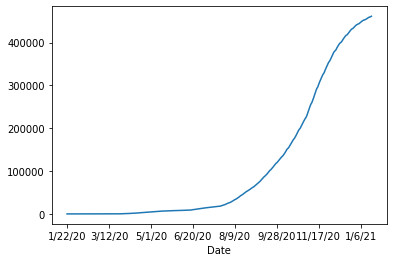

In [137]:
ts.plot()

Tester si le résidu de notre série temporelle est il un bruit blanc


In [138]:
import statsmodels.api as sm
res = sm.stats.acorr_ljungbox(ts, lags=[5])
print(f"Resultat du test Ljung-Box p-value: {  res[1][0] }")

Resultat du test Ljung-Box p-value: 0.0


/usr/local/lib/python3.6/dist-packages/statsmodels/stats/diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


Comme p_value est <<<< 0.05 alors on peut rejeter l'hypothèse H0, du coup le résidu de notre série n'est pas un bruit blanc

Tester si notre série temporelle est elle stationnaire?


In [139]:
from statsmodels.tsa.stattools import adfuller

res = adfuller(ts)
print("the p-value of this test  is ",res[1])

the p-value of this test  is  0.9035993119072898


Puisque la p-value du test de stationnarité Augmented Dickey-Fuller Test (ADF) est >>>> 0.05, alors on ne peut  pas rejeter l'hypothèse H0 qui suppose que la  série temporelle est non stationnaire donc notre série temporelle est non stationnaire

In [140]:
from statsmodels.tsa.stattools import kpss
res=kpss(ts)
print("the p-value of this test  is ",res[1])

the p-value of this test  is  0.01


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1850: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1882: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


Puisque la p-value du test de stationnarité Kwiatkowski-Phillips-Schmidt-Shin (KPSS) est << 0.05, alors on  peut rejeter l'hypothèse H0 qui suppose que la  série temporelle est  stationnaire donc notre série temporelle est non stationnaire

Autocorrelation Function Plot

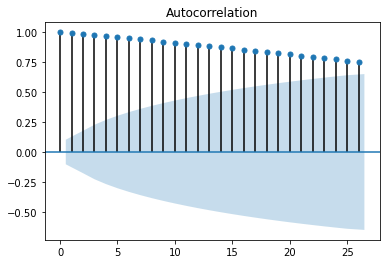

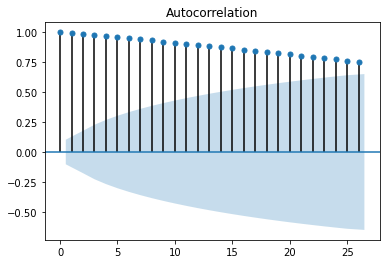

In [141]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(ts)

la décroissance lente vers 0 de l'autocorrelation function nous confirme le fait que notre série temporelle est non stationnaire

Partial Autocorrelation Function Plot

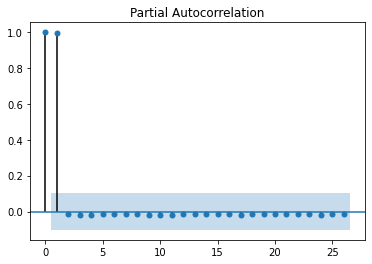

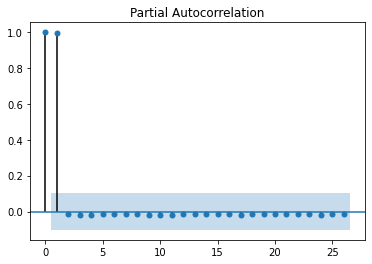

In [142]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(ts)

Puisque le PACF baisse brusquement après seulement 1 retards, on peut dire  qu'un modèle autorégressif d'ordre 1 AR(1) peut être approprié pour notre série temporelle

Faire des prédictions  à l'aide de la régression linéaire en considérant ts_t comme dependent variable et ts_(t-1) comme independent variable( c'est équivalent à construire manuellement un modèle AR(1))

In [143]:
confirmed_cases_shifted=df_new["Morocco"].shift()
confirmed_cases_shifted

Date
1/22/20         NaN
1/23/20         0.0
1/24/20         0.0
1/25/20         0.0
1/26/20         0.0
             ...   
1/15/21    456334.0
1/16/21    457625.0
1/17/21    458865.0
1/18/21    459671.0
1/19/21    460144.0
Name: Morocco, Length: 364, dtype: float64

In [144]:
frame={"confirmed_cases":ts,"confirmed_cases_shifted":confirmed_cases_shifted}
confirmed_cases_Morocco=pd.DataFrame(frame)
confirmed_cases_Morocco.head()

,confirmed_cases,confirmed_cases_shifted
Date,,
1/22/20,0,NaN
1/23/20,0,0.0
1/24/20,0,0.0
1/25/20,0,0.0
1/26/20,0,0.0


In [145]:
confirmed_cases_Morocco.dropna(inplace=True)
confirmed_cases_Morocco.head()

,confirmed_cases,confirmed_cases_shifted
Date,,
1/23/20,0,0.0
1/24/20,0,0.0
1/25/20,0,0.0
1/26/20,0,0.0
1/27/20,0,0.0


In [146]:
X=confirmed_cases_Morocco["confirmed_cases"].values
Y=confirmed_cases_Morocco["confirmed_cases_shifted"].values

In [147]:
train_size=int(0.80*len(X))
X_train,X_test=X[0:train_size],X[train_size:len(X)]
Y_train,Y_test=Y[0:train_size],Y[train_size:len(X)]

In [148]:
from sklearn.linear_model import LinearRegression
X_train=X_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)
lr=LinearRegression()
lr.fit(X_train,Y_train)
print(lr.coef_,lr.intercept_)
y_pred=lr.predict(X_test)
y_pred

[0.98094596] -76.63370677596686


array([251811.65210896, 254921.25081773, 260035.90307878, 265392.84899315,
       271469.80924577, 276879.72624226, 282642.78378611, 287514.16144785,
       290468.77069417, 295780.59309416, 301068.87279099, 305541.00544502,
       310157.33715589, 314769.7450829 , 318672.92907728, 321210.6362885 ,
       325133.43920218, 330017.56916147, 334115.96140287, 338620.46527374,
       342948.39887092, 346984.99151653, 349469.72764565, 352910.88609056,
       357174.07725406, 361523.59166247, 365443.45173826, 369482.98722176,
       372346.36849333, 373848.19676561, 376692.94006385, 380710.89473613,
       383992.15898875, 386969.32999226, 389944.53910383, 391918.20238523,
       393112.01362453, 395851.79570452, 399138.94563294, 401862.05163153,
       404458.61560065, 407237.63551924, 409100.45190661, 409960.74151784,
       412556.32454099, 415073.43188695, 417672.93869396, 419957.56184624,
       422281.42283711, 423769.51786588, 424701.41653255, 426820.25981676,
       428922.42701956, 4

In [149]:
from sklearn.metrics import mean_squared_error
import numpy as np
RMSE=np.sqrt(mean_squared_error(Y_test,y_pred))
RMSE

5268.491740626091

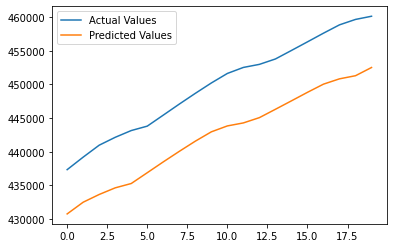

In [150]:
import matplotlib.pyplot as plt
plt.plot(Y_test[-20:],label="Actual Values")
plt.plot(y_pred[-20:],label="Predicted Values")
plt.legend()
plt.show()

Différencier notre série temporelle pour la rendre stationnaire

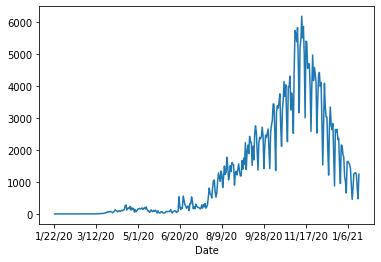

In [151]:
ts_diff=ts.diff()
ts_diff.plot()

In [152]:
ts_diff.isna()

Date
1/22/20     True
1/23/20    False
1/24/20    False
1/25/20    False
1/26/20    False
           ...  
1/15/21    False
1/16/21    False
1/17/21    False
1/18/21    False
1/19/21    False
Length: 364, dtype: bool

In [153]:
ts_diff = ts_diff[-ts_diff.isna()]
ts_diff   

Date
1/23/20       0.0
1/24/20       0.0
1/25/20       0.0
1/26/20       0.0
1/27/20       0.0
            ...  
1/15/21    1291.0
1/16/21    1240.0
1/17/21     806.0
1/18/21     473.0
1/19/21    1246.0
Length: 363, dtype: float64

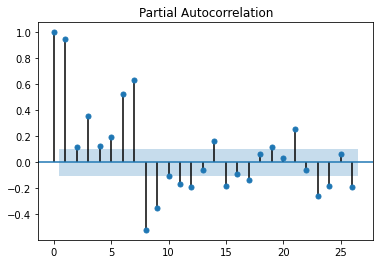

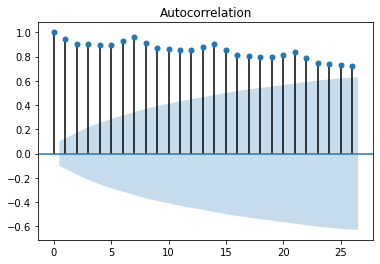

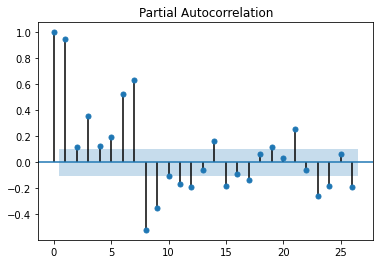

In [154]:
plot_acf(ts_diff)
plot_pacf(ts_diff)

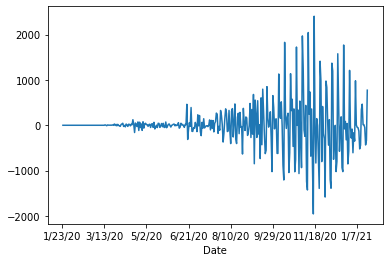

In [155]:
ts_diff2=ts_diff.diff()
ts_diff2.plot()

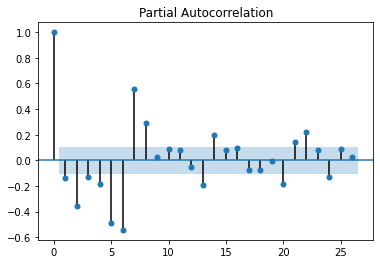

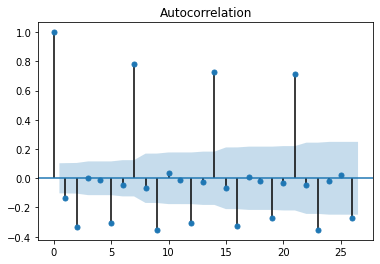

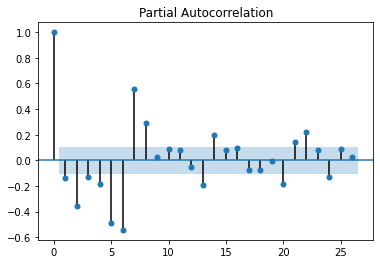

In [156]:
ts_diff2 = ts_diff2[-ts_diff2.isna()] 
plot_acf(ts_diff2)
plot_pacf(ts_diff2)

Split data et faire des prédictions à l'aide du modèle ARMA

In [157]:
ts_train=ts[:int(0.80*len(ts))]
ts_test=ts[int(0.80*len(ts)):]

In [158]:
modelARMA=ARMA(ts_train,order=(1,0))
model_fit=modelARMA.fit()
model_fit.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be use

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  291
Model:                     ARMA(1, 0)   Log Likelihood               -2553.448
Method:                       css-mle   S.D. of innovations           1513.749
Date:                Wed, 27 Jan 2021   AIC                           5112.895
Time:                        14:35:36   BIC                           5123.915
Sample:                    01-22-2020   HQIC                          5117.310
                         - 11-07-2020                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.147e+04        nan        nan        nan         nan         nan
ar.L1.y        1.0000        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [159]:
stardate=ts_test.index[0]
enddate=ts_test.index[-1]
predictions=model_fit.predict(stardate,enddate)
predictions

2020-11-08    252184.999630
2020-11-09    252184.999261
2020-11-10    252184.998891
2020-11-11    252184.998522
2020-11-12    252184.998152
                  ...      
2021-01-15    252184.974501
2021-01-16    252184.974131
2021-01-17    252184.973761
2021-01-18    252184.973392
2021-01-19    252184.973022
Freq: D, Length: 73, dtype: float64

In [165]:
RMSE_ARMA=np.sqrt(mean_squared_error(ts_test,predictions))
RMSE_ARMA

147647.13762925574

faire des prédictions à l'aide du modèle ARIMA

chercher l'ordre d'ARIMA qui donne la plus petite valeur de AIC


In [161]:
step_wisefit=auto_arima(ts,trace=True,suppress_warnings=True)
step_wisefit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=5433.892, Time=0.32 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=5525.132, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=5520.303, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=5487.163, Time=0.08 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=5432.723, Time=0.25 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=5432.944, Time=0.16 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=5455.139, Time=0.19 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=5398.026, Time=0.66 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=5432.063, Time=0.23 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=5395.807, Time=0.93 sec
 ARIMA(3,2,3)(0,0,0)[0]             : AIC=5361.089, Time=0.99 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=inf, Time=0.61 sec
 ARIMA(4,2,3)(0,0,0)[0]             : AIC=5318.937, Time=1.07 sec
 ARIMA(4,2,2)(0,0,0)[0]             : AIC=5267.776, Time=0.88 sec
 ARIMA(4,2,1)(0,0,0)[0]             : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  364
Model:               SARIMAX(5, 2, 5)   Log Likelihood               -2580.848
Date:                Wed, 27 Jan 2021   AIC                           5183.697
Time:                        14:35:52   BIC                           5226.505
Sample:                             0   HQIC                          5200.714
                                - 364                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2444      0.139      1.759      0.079      -0.028       0.517
ar.L2         -0.9937      0.111     -8.915      0.000      -1.212      -0.775
ar.L3          0.0013      0.193      0.007      0.995      -0.377       0.380
ar.L4         -0.5401      0.110     -4.912      0.000      -0.756      -0.325
ar.L5         -0.5280      0.130     -4.062      0.000      -0.783      -0.273
ma.L1         -0.8254      0.165     -5.014      0.000      -1.148      -0.503
ma.L2          1.2173      0.187      6.516      0.000       0.851       1.583
ma.L3         -0.6873      0.245     -2.809      0.005      -1.167      -0.208
ma.L4          0.6686      0.176      3.800      0.000       0.324       1.013
ma.L5         -0.0116      0.138     -0.084      0.933      -0.282       0.259
sigma2      1.423e+05   1.22e+04     11.662      0.000    1.18e+05    1.66e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               241.01
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):             160.48   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Donc l'ordre est (5,2,5)

In [162]:
ModeARIMA=ARIMA(ts_train,order=(5,2,5))
modelARIMA_fit=ModeARIMA.fit()
modelARIMA_fit.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be use

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D2.y   No. Observations:                  289
Model:                 ARIMA(5, 2, 5)   Log Likelihood               -2001.483
Method:                       css-mle   S.D. of innovations            233.666
Date:                Wed, 27 Jan 2021   AIC                           4026.966
Time:                        14:35:54   BIC                           4070.963
Sample:                    01-24-2020   HQIC                          4044.595
                         - 11-07-2020                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.4436        nan        nan        nan         nan         nan
ar.L1.D2.y    -0.1284        nan        nan        nan         nan         nan
ar.L2.D2.y    -0.7000   4.08e-05  -1.72e+04      0.000      -0.700      -0.700
ar.L3.D2.y    -0.6238   4.24e-05  -1.47e+04      0.000      -0.624      -0.624
ar.L4.D2.y    -0.2091   7.38e-06  -2.83e+04      0.000      -0.209      -0.209
ar.L5.D2.y    -0.9403        nan        nan        nan         nan         nan
ma.L1.D2.y    -0.1740      0.037     -4.743      0.000      -0.246      -0.102
ma.L2.D2.y     0.4732      0.032     14.751      0.000       0.410       0.536
ma.L3.D2.y     0.6292      0.025     24.863      0.000       0.580       0.679
ma.L4.D2.y    -0.1580      0.034     -4.618      0.000      -0.225      -0.091
ma.L5.D2.y     0.8600      0.034     25.463      0.000       0.794       0.926
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.6134           -0.7898j            1.0000           -0.1449
AR.2            0.6134           +0.7898j            1.0000            0.1449
AR.3           -1.0442           -0.0000j            1.0442           -0.5000
AR.4           -0.2025           -0.9887j            1.0092           -0.2821
AR.5           -0.2025           +0.9887j            1.0092            0.2821
MA.1           -1.0000           -0.0000j            1.0000           -0.5000
MA.2            0.6815           -0.7477j            1.0116           -0.1324
MA.3            0.6815           +0.7477j            1.0116            0.1324
MA.4           -0.0896           -1.0621j            1.0659           -0.2634
MA.5           -0.0896           +1.0621j            1.0659            0.2634
-----------------------------------------------------------------------------
"""

In [163]:
predictions_ARIMA=modelARIMA_fit.predict(stardate,enddate,typ="levels")
predictions_ARIMA

2020-11-08    257196.226193
2020-11-09    261683.838599
2020-11-10    267429.339173
2020-11-11    274274.175063
2020-11-12    280508.124966
                  ...      
2021-01-15    676533.717943
2021-01-16    682279.594034
2021-01-17    688571.781126
2021-01-18    695250.152400
2021-01-19    702299.226685
Freq: D, Length: 73, dtype: float64

In [167]:
RMSE_ARIMA=np.sqrt(mean_squared_error(ts_test,predictions_ARIMA))
RMSE_ARIMA

113635.14436306363